In [20]:
class temp:
        def __init__(self):
            self.normalise = 'standard'
            self.seed = 10
            self.layers = 2
            self.expt = 2
            self.batch = 16
            self.epochs= 2
            self.early = 0
            self.dropout = False
            self.reg = False
            self.dropout_rate = 0.0
            self.activation = 'relu'
            self.lr = 0.01
            self.hid = 128
            self.scratch = False
            self.name = None 
            self.device = None
    
args = temp() 
args.name = 'Expt{}_l{}_ep{}_early{}_reg{}_dr{}_rate_{}_act{}_hid{}_lr{}_sc{}_bch{}__norm{}_seed{}'.format(args.expt,args.layers,args.epochs,args.early,args.reg,args.dropout,args.dropout_rate,args.activation,args.hid,args.lr,args.scratch,args.batch,args.normalise,args.seed)
name = args.name
print(name)
args.device = 'cuda' if torch.cuda.is_available() else 'cpu'
    

Expt2_l2_ep2_early0_regFalse_drFalse_rate_0.0_actrelu_hid128_lr0.01_scFalse_bch16__normstandard_seed10


In [21]:

model = Res_Net(args).to(args.device)
model.load_state_dict(torch.load("Results/{}/model.pth".format(args.name)))

<All keys matched successfully>

In [22]:
print(model)

Res_Net(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_ru

In [24]:
activation = {}
def getActivation(name):
  # the hook signature
  def hook(model, input, output):
    activation[name] = output.detach()
  return hook

h1 = model.backbone.conv1.register_forward_hook(getActivation("conv1"))


In [26]:

data_train,data_valid,data_test = load_cifar(args)

Files already downloaded and verified
Train : 42000, Validation : 8000, Test : 10000 
<class 'torch.Tensor'> <class 'torch.Tensor'> torch.Size([16, 3, 32, 32]) torch.Size([16])


In [53]:
l = []
for X,y in data_test:
    out = model(X)
    l.append(activation["conv1"])
    break


In [33]:
print(l[0].shape)

torch.Size([32, 64, 16, 16])


torch.Size([3, 32, 32])
(32, 32, 3)


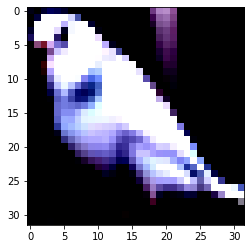

In [56]:
#plt.imshow(l[0][0][1])
import numpy as np
print(X[0].shape)
mean,std = np.array([0.485, 0.456, 0.406]),np.array([0.229, 0.224, 0.225])
t = np.moveaxis(X[0].numpy(),0,-1)
#t = t*std + mean
print(t.shape)
t = np.clip(t,0,1)
plt.imshow(t)

In [57]:
def print_train():
    pass

def print_layer():
    pass